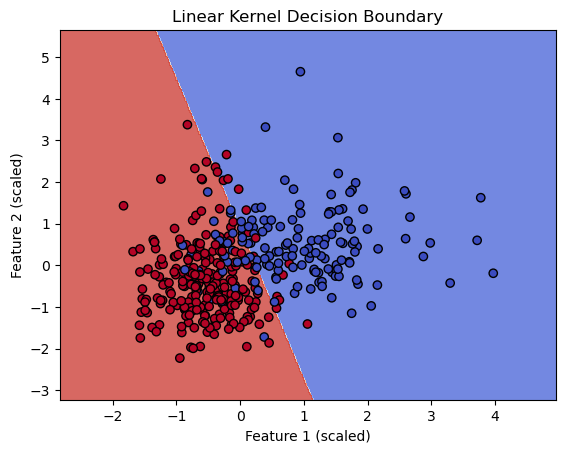

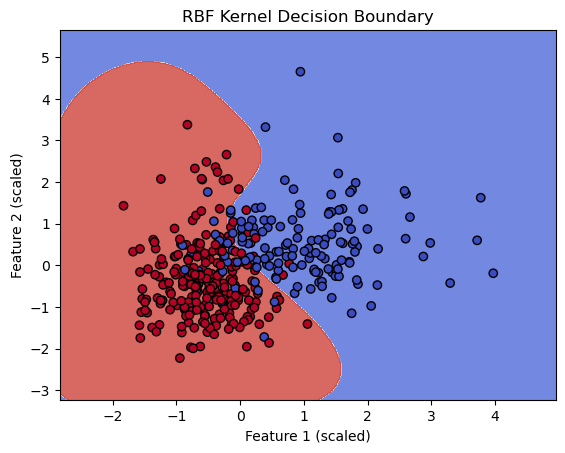

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1

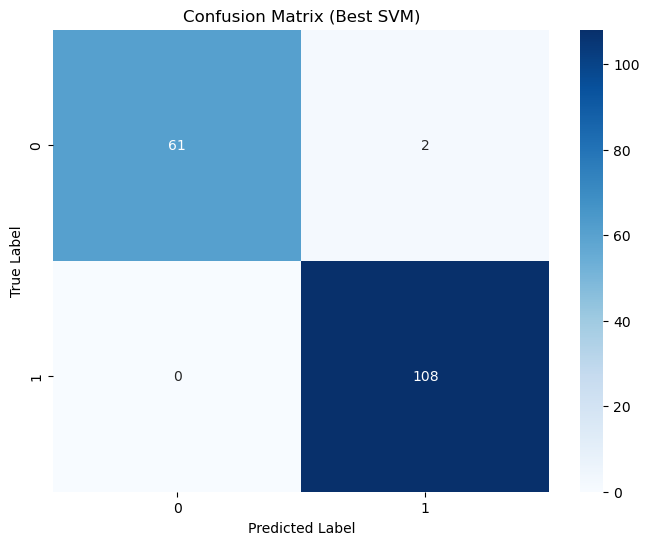

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_train_2d, y_train, svm_linear.fit(X_train_2d, y_train), "Linear Kernel Decision Boundary")
plot_decision_boundary(X_train_2d, y_train, svm_rbf.fit(X_train_2d, y_train), "RBF Kernel Decision Boundary")

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=2)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_
y_pred_grid = best_svm.predict(X_test)

cv_scores_linear = cross_val_score(svm_linear, X_scaled, y, cv=5)
cv_scores_rbf = cross_val_score(svm_rbf, X_scaled, y, cv=5)
cv_scores_best = cross_val_score(best_svm, X_scaled, y, cv=5)

print("Cross-Validation Scores (Linear):", cv_scores_linear)
print("Mean CV Accuracy (Linear):", np.mean(cv_scores_linear))

print("Cross-Validation Scores (RBF):", cv_scores_rbf)
print("Mean CV Accuracy (RBF):", np.mean(cv_scores_rbf))

print("Cross-Validation Scores (Best SVM):", cv_scores_best)
print("Mean CV Accuracy (Best SVM):", np.mean(cv_scores_best))

print("\n--- Linear Kernel ---")
print(classification_report(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))

print("\n--- RBF Kernel ---")
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

print("\n--- Best SVM (Grid Search) ---")
print(classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))

if svm_linear.kernel == 'linear':
    print("\nFeature Importance (Linear Kernel):")
    print(svm_linear.coef_)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()